# California Housing Prices [Linear Regression Model]
_____________

#### Steps :
   - Import dataset
   - Cleaning
   - Dealing with the Outliers
   - EDA
   - Define x , y 
   - Split Dataset [ train - test ]
   - Build and train model
   - Predict the test 
   - Evaluate model

In [ ]:
! pip install folium

### Data libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                        
import matplotlib.image as mpimg
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression           #build model
from sklearn.model_selection import train_test_split        #data splitting
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
import folium as folium
from folium import plugins
from folium.plugins import HeatMap

## Exploring the data

### Load Dataset
#### Read the `housing.csv` dataset into an object named `df`

In [ ]:
df = pd.read_csv("/content/house.csv")

In [ ]:
# Shows the number of rows and columns in the data
df.shape

(20640, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Using `.head()` to look at the first five rows of the data set.

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df=df[(df['median_house_value']>0) & (df['median_house_value']<300000)]

In [ ]:
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8598,-118.36,33.88,31.0,2518.0,543.0,1107.0,508.0,4.7404,295800.0,<1H OCEAN
8061,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813,159200.0,NEAR OCEAN
19572,-120.94,37.58,19.0,1549.0,369.0,770.0,370.0,2.0493,99500.0,INLAND
3451,-118.44,34.32,14.0,6235.0,1286.0,3568.0,1190.0,4.1724,211600.0,<1H OCEAN
14096,-117.11,32.75,11.0,1607.0,478.0,1384.0,450.0,2.0500,100000.0,NEAR OCEAN
18562,-122.04,37.00,52.0,3365.0,644.0,796.0,333.0,2.9712,116600.0,NEAR OCEAN
9554,-120.64,37.38,19.0,2256.0,449.0,1469.0,435.0,2.5129,84600.0,INLAND
1296,-121.81,37.99,22.0,2331.0,359.0,1086.0,340.0,5.1435,150800.0,INLAND
6798,-118.14,34.07,52.0,695.0,145.0,523.0,170.0,3.6650,220400.0,<1H OCEAN
12502,-121.46,38.57,52.0,1625.0,419.0,614.0,383.0,2.0549,156700.0,INLAND


#### using `.info` to explore columns index, columns names, non-Null count values and data type in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16774 entries, 5 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16774 non-null  float64
 1   latitude            16774 non-null  float64
 2   housing_median_age  16774 non-null  float64
 3   total_rooms         16774 non-null  float64
 4   total_bedrooms      16603 non-null  float64
 5   population          16774 non-null  float64
 6   households          16774 non-null  float64
 7   median_income       16774 non-null  float64
 8   median_house_value  16774 non-null  float64
 9   ocean_proximity     16774 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [ ]:
 # Sum total of the null values 
df.isnull().sum().sum()

171

####  `.isna().sum()` to sum the null values in the dataset for each column.

In [ ]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        171
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Using `.describe()` to see the statistics of our values

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16774.000000,16774.000000,16774.000000,16774.000000,16603.000000,16774.000000,16774.000000,16774.000000,16774.000000
mean,-119.509070,35.686326,27.979790,2546.311911,535.808107,1457.075176,496.276082,3.383996,161544.515083
std,1.999295,2.192250,12.307397,2112.355051,420.031088,1148.226896,379.448069,1.312453,65140.515053
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.500000,33.930000,18.000000,1402.000000,295.000000,804.000000,278.000000,2.392900,108225.000000
50%,-118.500000,34.280000,28.000000,2049.000000,433.000000,1196.000000,407.000000,3.221600,158500.000000
75%,-117.960000,37.750000,36.000000,3044.000000,644.000000,1771.000000,600.750000,4.208100,212600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,299700.000000


In [ ]:
df['ocean_proximity'].unique() #show unique Row in column

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df.ocean_proximity= df.ocean_proximity.str.replace('<', 'less ') # replace symbol < to 'less' in Row
df.ocean_proximity.unique()

array(['NEAR BAY', 'less 1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
bedroom_median = df['total_bedrooms'].median()
bedroom_median

433.0

In [ ]:
df['total_bedrooms'].fillna(bedroom_median, inplace=True) # fill the null values with bedroom_median

#### Using `.tail()` to look at the last five rows of the data set.

In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


####  `.duplicated().sum()` to sum the duplicated values in the dataset.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000,16774.000000
mean,-119.509070,35.686326,27.979790,2546.311911,534.760045,1457.075176,496.276082,3.383996,161544.515083
std,1.999295,2.192250,12.307397,2112.355051,418.012099,1148.226896,379.448069,1.312453,65140.515053
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.500000,33.930000,18.000000,1402.000000,297.000000,804.000000,278.000000,2.392900,108225.000000
50%,-118.500000,34.280000,28.000000,2049.000000,433.000000,1196.000000,407.000000,3.221600,158500.000000
75%,-117.960000,37.750000,36.000000,3044.000000,641.000000,1771.000000,600.750000,4.208100,212600.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,299700.000000


#### The result of `.value_counts()` is the **ocean_proximity** column's values as its index.

In [ ]:
df['ocean_proximity'].value_counts()

less 1H OCEAN    7022
INLAND           6344
NEAR OCEAN       1880
NEAR BAY         1527
ISLAND              1
Name: ocean_proximity, dtype: int64

## Dealing with the Outliers

#### Defining a function called `plot_outliers` to show the outliers in my plots.
#### Defining a function called `plot_hist` to visualize, and we will use it in visualizing the outliers.

In [ ]:
def plot_outliers(df,col):
    plt.title(col)
    ax = sns.boxplot(data=df, x=col)
    ax.set(xlabel='')
    plt.show()

def plot_hist(df,col):
    plt.hist(x=df[col],bins=40,color='#D11239')
    plt.show();

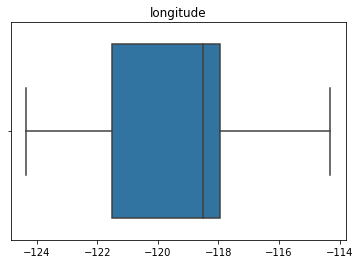

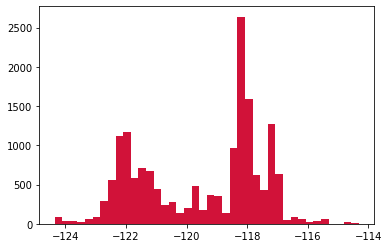

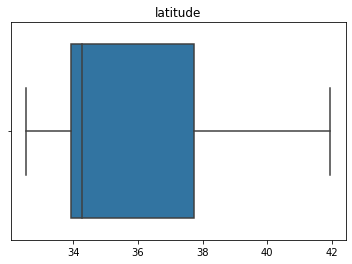

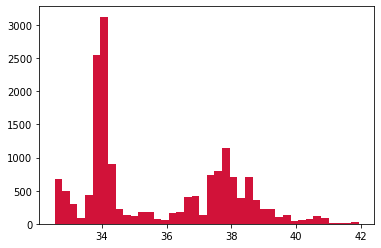

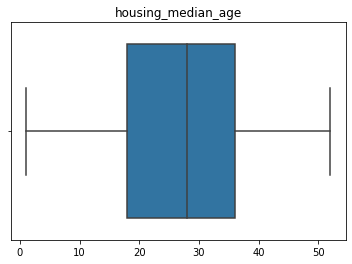

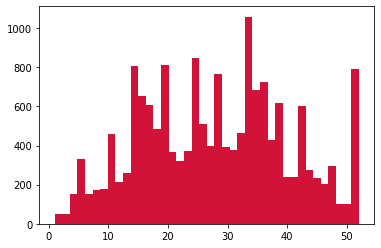

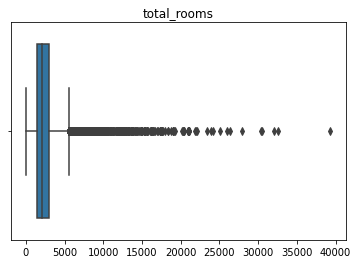

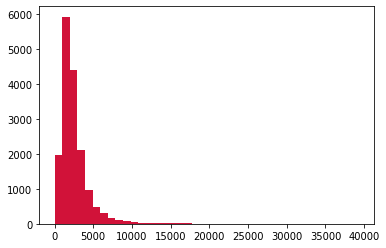

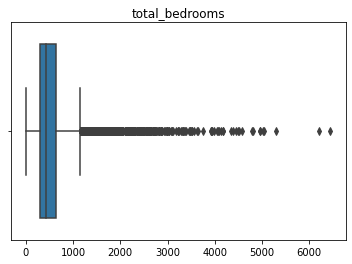

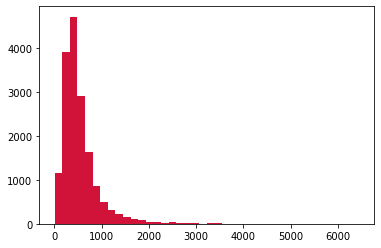

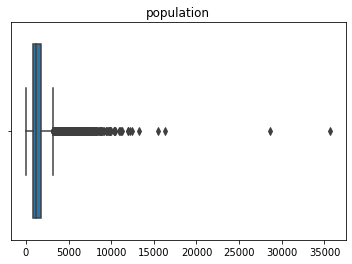

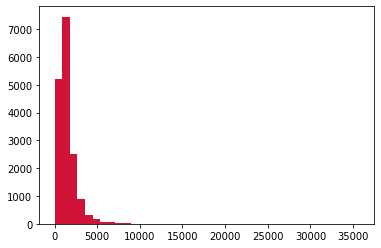

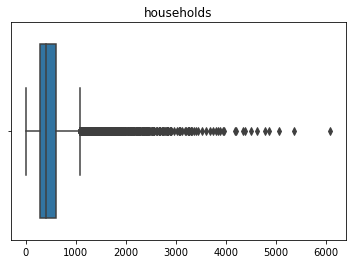

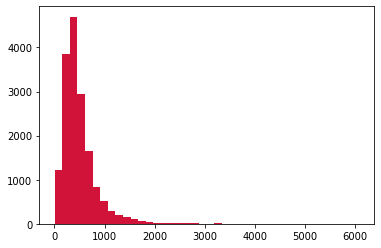

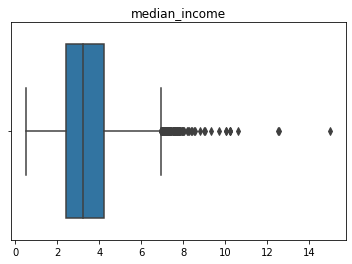

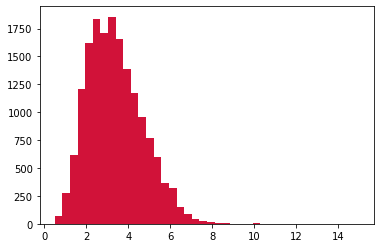

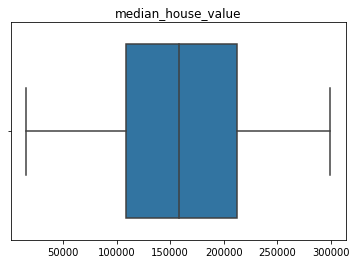

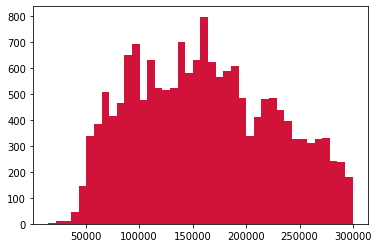

In [ ]:
for col in df.columns:
    if df[col].dtype == 'float64':
        plot_outliers(df,col)
        plot_hist(df,col)

#### Bedrooms

In [ ]:
firstQ = df['total_bedrooms'].quantile(0.25)
thirdQ = df['total_bedrooms'].quantile(0.75)
IQR = thirdQ - firstQ
IQR

344.0

In [ ]:
newB = thirdQ + 3*(IQR)
df.drop(df[df['total_bedrooms']>newB].index, axis = 0, inplace =True)

In [ ]:
df.shape

(16402, 10)

#### population

In [ ]:
firstQ_p = df['population'].quantile(0.25)
thirdQ_p = df['population'].quantile(0.75)
IQR_p = thirdQ_p - firstQ_p
IQR_p

923.5

In [ ]:
newB_p = thirdQ_p + 3*(IQR_p)
df.drop(df[df['population']>newB_p].index, axis = 0, inplace =True)
df.shape

(16281, 10)

#### households

In [ ]:
firstQ_h = df['households'].quantile(0.25)
thirdQ_h = df['households'].quantile(0.75)
IQR_h = thirdQ_h - firstQ_h
IQR_h

302.0

In [ ]:
newB_h = thirdQ_h + 3*(IQR_h)
df.drop(df[df['households']>newB_h].index, axis = 0, inplace =True)
df.shape

(16235, 10)

#### Total rooms

In [ ]:
firstQ_t = df['total_rooms'].quantile(0.25)
thirdQ_t = df['total_rooms'].quantile(0.75)
IQR_t = thirdQ_t - firstQ_t
IQR_t

1530.0

In [ ]:
newB_t = thirdQ_t + 3*(IQR_t)
df.drop(df[df['total_rooms']>newB_t].index, axis = 0, inplace =True)
df.shape

(16136, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000
mean,-119.529793,35.703413,28.488783,2260.838312,478.379276,1310.528818,446.100397,3.364695,160798.493803
std,1.997207,2.196946,12.144467,1298.125043,269.729105,745.459915,249.934512,1.309105,65210.156281
min,-124.350000,32.540000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900,14999.000000
25%,-121.520000,33.930000,18.000000,1377.000000,292.000000,790.000000,274.000000,2.375000,106800.000000
50%,-118.530000,34.300000,29.000000,1995.000000,425.000000,1165.000000,397.000000,3.201550,158000.000000
75%,-117.980000,37.750000,37.000000,2886.250000,610.000000,1686.000000,570.000000,4.185525,212100.000000
max,-114.310000,41.950000,52.000000,7483.000000,1646.000000,4486.000000,1481.000000,15.000100,299700.000000


--------
## EDA 

# Q1: Does the age of the house affect on the house value?

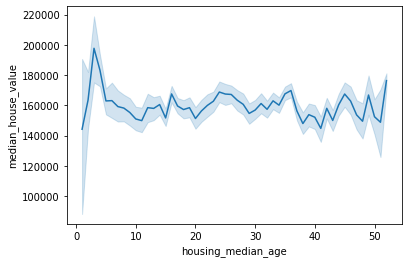

In [ ]:
sns.lineplot(data=df, x="housing_median_age", y="median_house_value")   

#### Using `.corr()` to show the correlation between the columns

In [ ]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923170,-0.070133,0.019351,0.057493,0.126670,0.051076,0.016406,0.005905
latitude,-0.923170,1.000000,-0.025250,-0.007797,-0.065266,-0.160823,-0.082538,-0.084544,-0.206453
housing_median_age,-0.070133,-0.025250,1.000000,-0.370105,-0.303042,-0.234674,-0.279911,-0.215164,0.013414
total_rooms,0.019351,-0.007797,-0.370105,1.000000,0.903356,0.792186,0.897794,0.238748,0.178002
total_bedrooms,0.057493,-0.065266,-0.303042,0.903356,1.000000,0.835850,0.964777,-0.015468,0.109396
population,0.126670,-0.160823,-0.234674,0.792186,0.835850,1.000000,0.882457,0.022528,0.072429
households,0.051076,-0.082538,-0.279911,0.897794,0.964777,0.882457,1.000000,0.022359,0.141610
median_income,0.016406,-0.084544,-0.215164,0.238748,-0.015468,0.022528,0.022359,1.000000,0.598308
median_house_value,0.005905,-0.206453,0.013414,0.178002,0.109396,0.072429,0.141610,0.598308,1.000000


In [ ]:
df.corr()['median_house_value'].sort_values(ascending=False) 
#to show the correlation between median_house_value column and the other columns 

median_house_value    1.000000
median_income         0.598308
total_rooms           0.178002
households            0.141610
total_bedrooms        0.109396
population            0.072429
housing_median_age    0.013414
longitude             0.005905
latitude             -0.206453
Name: median_house_value, dtype: float64

<function matplotlib.pyplot.show>

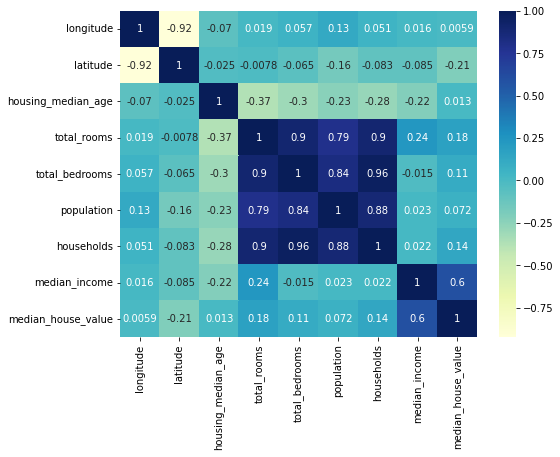

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show

#visualize the correlation

#### Defining a function called `show_values()` to show values in my plots

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


# Q2: Where does people prefer on their house location?

#### `.countplot()` to count how many time the variable has been repeated.

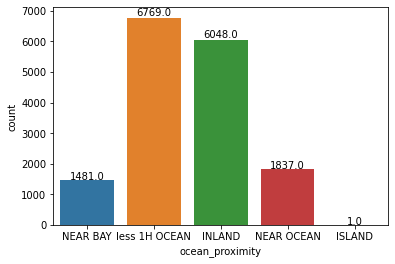

In [ ]:

x1=sns.countplot(x=df['ocean_proximity'], data=df)
show_values(x1)

## Q3: Does the proximity from the house to the ocean affect its price?

#### Using `.imread` in the map plot to insert an image

Text(0, 0.5, 'latitude')

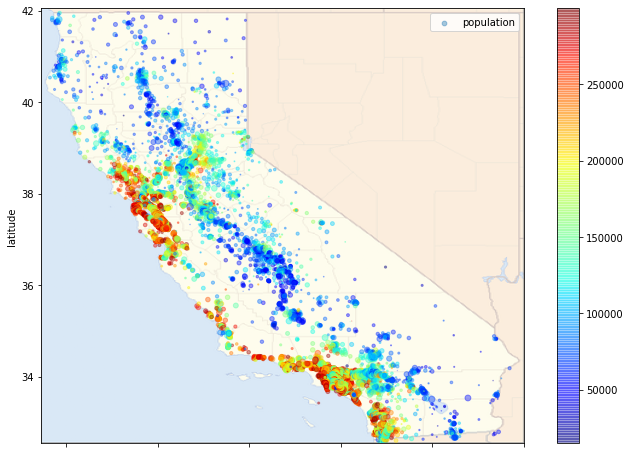

In [ ]:
df.plot(kind = "scatter", x="longitude" , y="latitude" , c =df["median_house_value"], s =df["population"]/100,
        alpha = 0.4, cmap = plt.get_cmap("jet"),label='population', figsize = (12,8))


#load png image
map_image = mpimg.imread("california.png")

plt.imshow(map_image, extent = [-124.55, -114, 32.55, 42.05], alpha = 0.4, cmap = plt.get_cmap("jet"))

plt.xlabel("longitude")
plt.ylabel("latitude")

- the closer we are to the ocean, the more expensive the houses values become

## Q4: What is the most city that had the highest population?

In [ ]:
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map

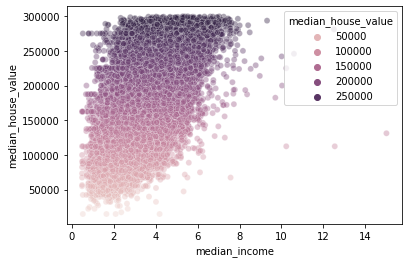

In [ ]:
sns.scatterplot(x=df['median_income'], y=df['median_house_value'], hue=df['median_house_value'],alpha=0.4)

#df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

#### Using `.get_dummies` to change the object value to (0,1) values

In [ ]:
df = pd.get_dummies(df, prefix=None)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_less 1H OCEAN
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,1,0,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,1,0,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,1,0,0


---------------
## Define x , y

In [ ]:
X = df.drop(columns=["median_house_value","longitude", "latitude","ocean_proximity_ISLAND" ]).astype(float)
y = df.loc[:,'median_house_value'].astype(float)

In [ ]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,ocean_proximity_less 1H OCEAN
5,52.0,919.0,213.0,413.0,193.0,4.0368,0.0,1.0,0.0,0.0
6,52.0,2535.0,489.0,1094.0,514.0,3.6591,0.0,1.0,0.0,0.0
7,52.0,3104.0,687.0,1157.0,647.0,3.1200,0.0,1.0,0.0,0.0
8,42.0,2555.0,665.0,1206.0,595.0,2.0804,0.0,1.0,0.0,0.0
9,52.0,3549.0,707.0,1551.0,714.0,3.6912,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,1.0,0.0,0.0,0.0
20636,18.0,697.0,150.0,356.0,114.0,2.5568,1.0,0.0,0.0,0.0
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,1.0,0.0,0.0,0.0
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,1.0,0.0,0.0,0.0


In [ ]:
y

5        269700.0
6        299200.0
7        241400.0
8        226700.0
9        261100.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 16136, dtype: float64

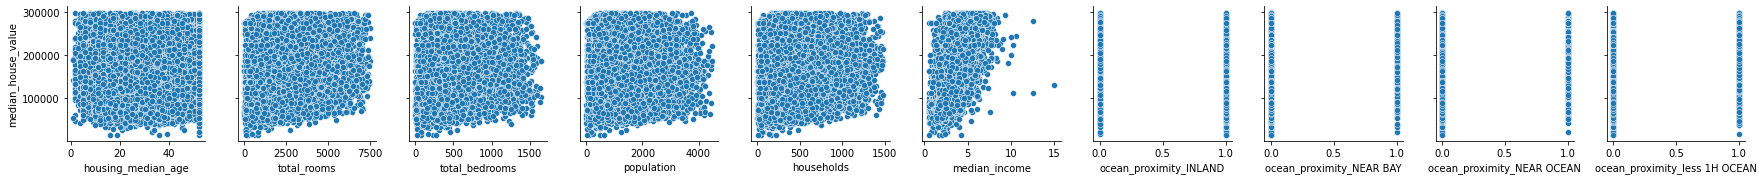

In [ ]:
sns.pairplot(df, x_vars=['housing_median_age','total_rooms','total_bedrooms'
                         ,'population','households','median_income','ocean_proximity_INLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','ocean_proximity_less 1H OCEAN'], y_vars='median_house_value',diag_kind='kde')

---------------

## Split dataset [ train - vaidation - test ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [ ]:
### Actual train,test and val
y_actual_train=y_train
y_actual_test=y_test

----------
## Scale

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

----------

## The Model

## Linear Regression Model

In [ ]:
my_model = LinearRegression()
my_model.fit(X_train , y_train)

LinearRegression()

In [ ]:
print(f'The Linear regression coefficients are: {my_model.coef_}')
print(f'The Linear regression interception is: {my_model.intercept_}')

The Linear regression coefficients are: [ 3.85555158e+02 -6.64924937e+00  4.61059655e+01 -2.52522781e+01
  7.94147370e+01  2.85215279e+04 -4.12471092e+04  9.64088211e+03
  1.50433356e+04  1.65628915e+04]
The Linear regression interception is: 50488.57693397606


In [ ]:
# Predict Value
y_predict = my_model.predict(X_test)
y_predict

array([194151.62793618, 171812.14326249, 209605.05019561, ...,
       103164.99042174, 234459.09024404, 123569.53792005])

In [ ]:
#real Value
y_test

14117    126700.0
14942    189900.0
17440    142400.0
17086    211000.0
18723    151600.0
           ...   
17708    231400.0
1224     122300.0
2437      73000.0
16860    144200.0
15719    237500.0
Name: median_house_value, Length: 3228, dtype: float64

In [ ]:
# Regression Score
train_data_score = my_model.score(X_train , y_train)
test_data_score = my_model.score(X_test , y_test)


print(f'The Linear regression train R^2 is: {train_data_score}')
print(f'The Linear regression test R^2 is: {test_data_score}')

The Linear regression train R^2 is: 0.5952549909344813
The Linear regression test R^2 is: 0.5834453564850524


In [ ]:
y_pred_lr = my_model.predict(X_test)
r2_score(y_test, y_pred_lr)

0.5834453564850524

In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pred_lr)).mean() 
RMSE = math.sqrt(MSE)
print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 1761763937.5897346
Root Mean Square Error: 41973.37176817863


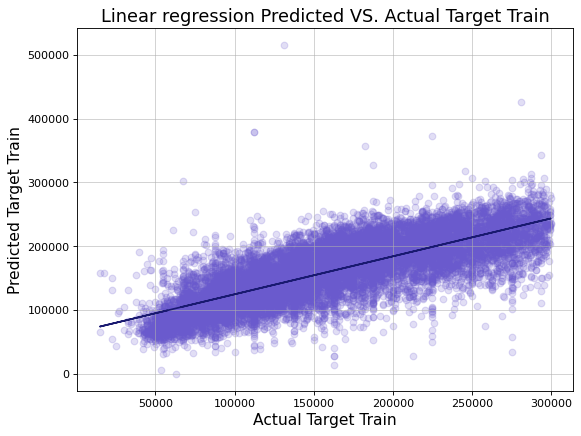

In [ ]:
y_train_pred_linear = my_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_linear, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_linear, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Linear regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

------
### Decision tree regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT_model = DecisionTreeRegressor(max_depth=4)
DT_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
# Predict Value
y_predict_dt = DT_model.predict(X_test)
y_predict_dt

array([207664.22115896, 190384.89208633, 207664.22115896, ...,
       105849.85250737, 190384.89208633, 127463.21070234])

In [ ]:
#real Value
y_test

14117    126700.0
14942    189900.0
17440    142400.0
17086    211000.0
18723    151600.0
           ...   
17708    231400.0
1224     122300.0
2437      73000.0
16860    144200.0
15719    237500.0
Name: median_house_value, Length: 3228, dtype: float64

In [ ]:
## Score
train_data_score_dt = DT_model.score(X_train , y_train)
test_data_score_dt = DT_model.score(X_test , y_test)

print(f'The Decision tree regressor train R^2 is: {train_data_score_dt}')
print(f'The Decision tree regressor test R^2 is: {test_data_score_dt}')

The Decision tree regressor train R^2 is: 0.5738477145141063
The Decision tree regressor test R^2 is: 0.540566537188119


In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_dt)).mean() 
RMSE = math.sqrt(MSE)
print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 1943114352.714934
Root Mean Square Error: 44080.77078176985


-----
## Lasso Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy import mean
from numpy import std
from numpy import absolute

In [ ]:
lasso_model = Lasso(alpha=1.0)

In [ ]:
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
# Predict Value
y_predict_lasso = lasso_model.predict(X_test)
y_predict_lasso

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-12662491.93527924, -36576142.47989307, -41927067.61021516, ...,
       -16974952.79494489, -20448799.03691976, -17381993.97577653])

In [ ]:
## Score
train_data_score_ls = lasso_model.score(X_train_scaled , y_train)
test_data_score_ls = lasso_model.score(X_test_scaled , y_test)

print(f'The Ridge regression train R^2 is: {train_data_score_ls}')
print(f'The Ridge regression test R^2 is: {test_data_score_ls}')

The Ridge regression train R^2 is: 0.5952549763385164
The Ridge regression test R^2 is: 0.5837476262469002


In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_lasso)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 1127917815639475.8
Root Mean Square Error: 33584487.723344475


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


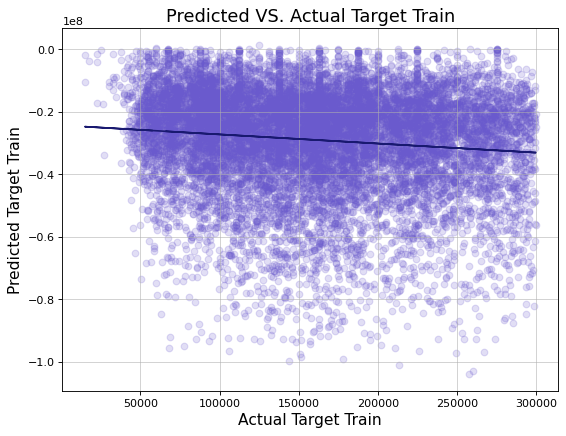

In [ ]:
y_train_pred_lasso = lasso_model.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_lasso, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_lasso, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

## Ridge Regression

In [ ]:
rl = Ridge(alpha=1)

In [ ]:
rl.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [ ]:
#Score
rl_train = rl.score(X_train_scaled, y_train)
rl_test = rl.score(X_test_scaled, y_test)


print(f'The Ridge regression train R^2 is: {rl_train}')
print(f'The Ridge regression test R^2 is: {rl_test}')

The Ridge regression train R^2 is: 0.5952549672751535
The Ridge regression test R^2 is: 0.5833319048499881


In [ ]:
# Predict Value
y_predict_ri = rl.predict(X_test)
y_predict_ri

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([-12652270.24133756, -36555011.25737814, -41909088.38270839, ...,
       -16960068.24564275, -20434217.82430204, -17370912.33043935])

In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_predict_ri)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 1126717645962449.2
Root Mean Square Error: 33566615.05070848


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


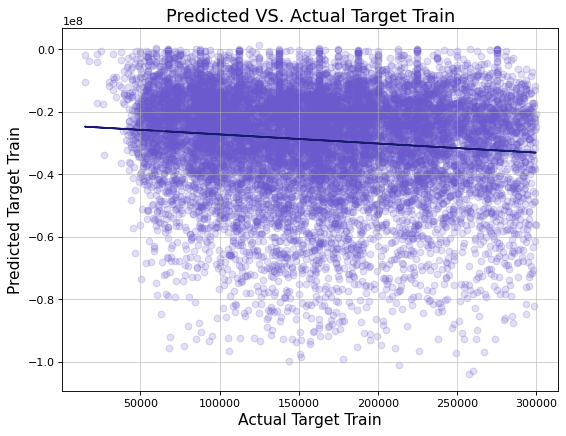

In [ ]:
y_train_pred_rl = rl.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_rl, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_rl, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

## Random Forest Regressor Model

In [ ]:
forest=RandomForestRegressor(n_estimators=5)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [ ]:
y_pr_f=forest.predict(X_test)
y_pr_f

array([196540., 212240., 200980., ...,  74560., 217900., 104540.])

In [ ]:
#real Value
y_test

14117    126700.0
14942    189900.0
17440    142400.0
17086    211000.0
18723    151600.0
           ...   
17708    231400.0
1224     122300.0
2437      73000.0
16860    144200.0
15719    237500.0
Name: median_house_value, Length: 3228, dtype: float64

In [ ]:
train_data_score_forest = forest.score(X_train , y_train)
test_data_score_forest = forest.score(X_test , y_test)

print(f'The Random Forest Regressor train R^2 is: {train_data_score_forest}')
print(f'The Random Forest Regressor test R^2 is: {test_data_score_forest}')

The Random Forest Regressor train R^2 is: 0.9070957494175549
The Random Forest Regressor test R^2 is: 0.5234361099621792


In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_pr_f)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 2015565276.9622428
Root Mean Square Error: 44895.04735449382


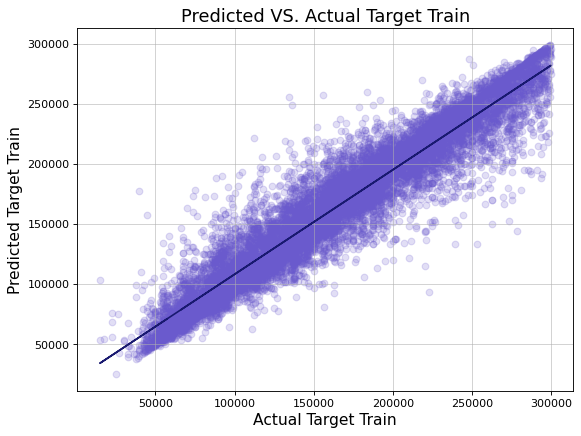

In [ ]:
y_train_pred_forest = forest.predict(X_train)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_forest, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_forest, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train', fontsize=14)
plt.ylabel('Predicted Target Train', fontsize=14)
plt.title('Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)

## Polynomial Regression Model

In [ ]:
poly = PolynomialFeatures(degree=3) 

X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [ ]:
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
X_poly = poly.fit_transform(X_test)
regressor = LinearRegression()
regressor.fit(X_poly,y_test)
y_poly_pred=regressor.predict(X_poly)

In [ ]:
#Score
poly_test=poly_model.score(X_test_poly, y_test)
poly_train=poly_model.score(X_train_poly, y_train)

print(f'The polynomial regression train R^2 is: {poly_train}')
print(f'polynomial regression test R^2 is: {poly_test}')

The polynomial regression train R^2 is: 0.6566873739590509
polynomial regression test R^2 is: 0.6131072219715323


In [ ]:
# Evaluate
import math
MSE = np.square(np.subtract(y_actual_test,y_poly_pred)).mean() 
RMSE = math.sqrt(MSE)

print(f'Mean Absolute Error: {MSE}')
print(f'Root Mean Square Error: {RMSE}')

Mean Absolute Error: 1460725554.3760035
Root Mean Square Error: 38219.43948275541


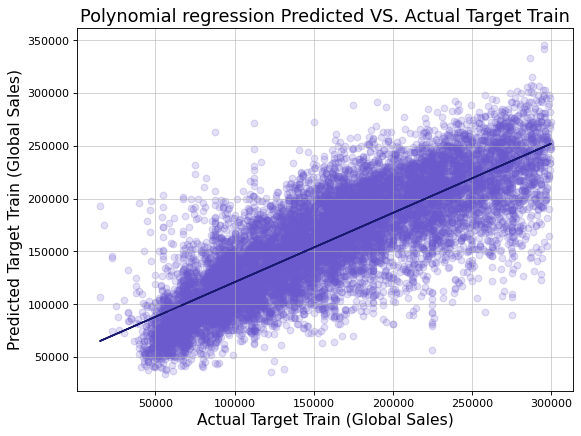

In [ ]:
y_train_pred_poly = poly_model.predict(X_train_poly)
plt.figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred_poly, alpha=0.2, color='slateblue')

m, b = np.polyfit(y_train, y_train_pred_poly, 1)
# m = slope 
# b = intercept

plt.plot(y_train, m*y_train + b, color='midnightblue')

plt.xlabel('Actual Target Train (Global Sales)', fontsize=14)
plt.ylabel('Predicted Target Train (Global Sales)', fontsize=14)
plt.title('Polynomial regression Predicted VS. Actual Target Train', fontsize=16)
plt.grid(linewidth=0.5)